# 1. Introduction

In [1]:
import pandas as pd

happiness2015=pd.read_csv("wh_2015.csv")
happiness2016=pd.read_csv("wh_2016.csv")
happiness2017=pd.read_csv("wh_2017.csv")

shape_2015=happiness2015.shape
shape_2016=happiness2016.shape
shape_2017=happiness2017.shape

print(shape_2015,shape_2016,shape_2017)

(164, 13) (164, 14) (164, 13)


# 2. Identifying Missing Values

In [2]:
missing_2016=happiness2016.isnull().sum()
missing_2017=happiness2017.isnull().sum()

print(missing_2016,missing_2017)

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64 Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64


# 3. Correcting Data Cleaning Errors that Result in Missing Values


| Method               | Description                                                   |
|----------------------|---------------------------------------------------------------|
| Series.str.split()   | Splits each element in the Series.                            |
| Series.str.strip()   | Strips whitespace from each string in the Series.             |
| Series.str.lower()   | Converts strings in the Series to lowercase.                  |
| Series.str.upper()   | Converts strings in the Series to uppercase.                  |
| Series.str.get()     | Retrieves the ith element of each element in the Series.      |
| Series.str.replace() | Replaces a regex or string in the Series with another string. |
| Series.str.cat()     | Concatenates strings in a Series.                             |
| Series.str.extract() | Extracts substrings from the Series matching a regex pattern. |

<AxesSubplot:ylabel='YEAR'>

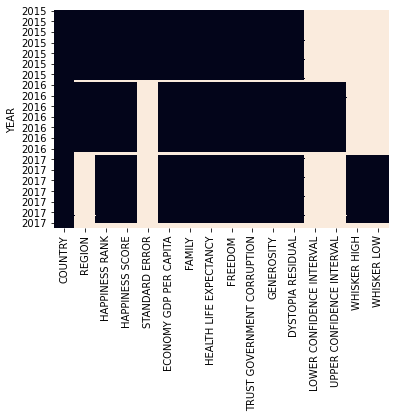

In [3]:
import seaborn as sns

happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

#happiness2015.columns=happiness2015.columns.str.replace("."," ").str.replace("\s+", " ").str.strip().str.upper()

happiness2015.columns=happiness2015.columns.str.replace("."," ").str.replace("(","").str.replace(")","").str.strip().str.upper()


happiness2016.columns=happiness2016.columns.str.replace("."," ").str.replace("(","").str.replace(")","").str.strip().str.upper()


combined=pd.concat([happiness2015,happiness2016,happiness2017], ignore_index=True)

missing=combined.isnull().sum()
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

# 4. Visualizing Missing Dat

In [4]:
regions_2017=combined[combined["YEAR"]==2017]["REGION"]

missing=regions_2017.isnull().sum()

print(missing,regions_2017, sep="\n")

164
328    NaN
329    NaN
330    NaN
331    NaN
332    NaN
      ... 
487    NaN
488    NaN
489    NaN
490    NaN
491    NaN
Name: REGION, Length: 164, dtype: object


# 5. Using Data From Additional Sources to Fill in Missing Values

In [5]:
regions = happiness2015[["COUNTRY","REGION"]].merge(happiness2016[["COUNTRY","REGION"]], on="COUNTRY")

combined=pd.merge(left=combined,right=regions,on="COUNTRY",how="left")


combined=combined.drop("REGION_x",axis=1)

print(combined.columns)

missing=combined.isnull().sum()

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR', 'LOWER CONFIDENCE INTERVAL',
       'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW', 'REGION_y'],
      dtype='object')


How should regions be properly generated?

# 6. Identifying Duplicates Values

In [6]:
combined["COUNTRY"]=combined["COUNTRY"].str.upper()

dups=combined.duplicated(["COUNTRY","YEAR"])

combined[dups]

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN


# 7. Correcting Duplicates Values 

In [7]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

combined=combined.drop_duplicates(["COUNTRY","YEAR"])

# 8. Handle Missing Values by Dropping Columns

In [8]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined=combined.drop(columns_to_drop,axis=1)

missing=combined.isnull().sum()

print(missing)

COUNTRY                          0
REGION                         174
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
ECONOMY GDP PER CAPITA          19
FAMILY                          19
HEALTH LIFE EXPECTANCY          19
FREEDOM                         19
TRUST GOVERNMENT CORRUPTION     19
GENEROSITY                      19
DYSTOPIA RESIDUAL               19
YEAR                             0
REGION_y                        19
dtype: int64


# 9. Handle Missing Values by Dropping Columns Continued

In [17]:
combined=combined.dropna(axis=1,thresh=159)

missing=combined.isnull().sum()

print(combined,missing,sep="\n")

               COUNTRY          REGION  HAPPINESS RANK  HAPPINESS SCORE  \
0          SWITZERLAND  Western Europe             1.0            7.587   
1              ICELAND  Western Europe             2.0            7.561   
2              DENMARK  Western Europe             3.0            7.527   
3               NORWAY  Western Europe             4.0            7.522   
4               CANADA   North America             5.0            7.427   
..                 ...             ...             ...              ...   
486               OMAN             NaN             NaN              NaN   
487        PUERTO RICO             NaN             NaN              NaN   
488  SOMALILAND REGION             NaN             NaN              NaN   
490           SURINAME             NaN             NaN              NaN   
491          SWAZILAND             NaN             NaN              NaN   

     ECONOMY GDP PER CAPITA   FAMILY  HEALTH LIFE EXPECTANCY  FREEDOM  \
0                   1.3965

# 10. Analyzing Missing Data